In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import random

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import collections
import math

In [2]:
# Remove the outliers
def remove_outliers(file_path):
    # return the list of dataframes
    dataframe_lists = []
    # Creating the dataframe and selecting the required columns
    for i in range(64):
        df = pd.read_csv(file_path, usecols=[1,2,3,4], skiprows=i*72000, nrows = 72000, names=["lz","X","Y","Z"])
        df['radiusSquare'] = df['X']*df['X']+df['Y']*df['Y']+df['Z']*df['Z']
        df['radius'] = np.sqrt(df['radiusSquare']).round(1)
        df['freq'] = df.groupby(['lz','radius'])['radius'].transform('count')
        for j in range(64):
            maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
            while maxfreq>100:
                df.drop(df[(df['lz']==j) & (df['freq']==maxfreq)].index, inplace=True)
                maxfreq = df[(df['lz']==j) & (df['radius']!=0)]['freq'].max()
                df.drop(df[(df['lz']==j) & (df['radius']==0)].index, inplace=True)
        dataframe_lists.append(df.iloc[:,1:4])
    return dataframe_lists

In [3]:
# atm = remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_initial_dataset/Atm/in.csv")
# This the second data set that contains multiple objects
allData= remove_outliers("/home/kia/Collected-Datasets/DEBS2019/debs2019_dataset2/in.csv")


mX=np.array(allData[0]['X'])
mY=np.array(allData[0]['Y'])
mZ=np.array(allData[0]['Z'])

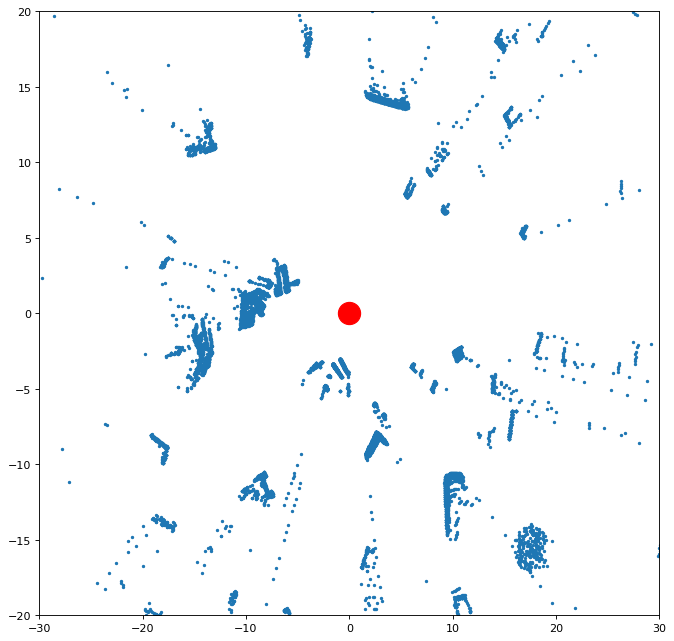

In [4]:
for i in range(0, 1):
    fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
    #ax = fig.gca()
    #ax.set_xticks(np.arange(-120, 120, grid_size))
    #ax.set_yticks(np.arange(-120, 120, grid_size))

    plt.scatter(allData[i]['Z'], allData[i]['X'], s=4)
    plt.scatter(0, 0, s=400, c="red")
    plt.xlim(-30, 30)
    plt.ylim(-20, 20)
    plt.savefig(str(i)+'-image.png')
    plt.show()

In [5]:
# math.tanh(45)
math.tan(math.radians(135))

-1.0000000000000002

In [6]:
math.tan(math.radians(135))

-1.0000000000000002

In [7]:
math.degrees(math.atan(-1))

-45.0

In [8]:
print(math.tan.__doc__)



Return the tangent of x (measured in radians).


In [9]:


# math.degrees(1)
# math.degrees(-100000)  

#math.tanh(45)
# 1 

# math.atanh(1)
90-math.degrees(math.atan(-1))


135.0

In [326]:
newX=np.array(allData[0]['X'])
newY=np.array(allData[0]['Z'])

# Filter positive data 

newX_positives= newX[newY>0]
newY_positives= newY[newY>0]


# Filter negative data 

newX_negatives= newX[newY<0]
newY_negatives= newY[newY<0]

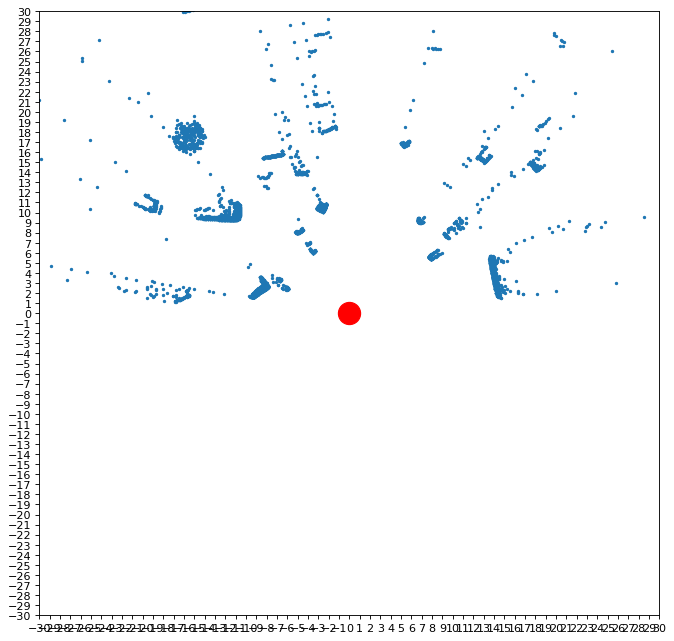

In [327]:
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.gca()
ax.set_xticks(np.arange(-120, 120, grid_size))
ax.set_yticks(np.arange(-120, 120, grid_size))

plt.scatter(newX_positives, newY_positives, s=4)
plt.scatter(0, 0, s=400, c="red")

plt.xlim(-30, 30)
plt.ylim(-30, 30)

plt.show()

In [328]:
import math
# math.degrees(0)  
# math.degrees(math.pi/2)  
old_err_state = np.seterr(divide='raise')
ignored_states = np.seterr(**old_err_state)

calDegrees=lambda x : round(math.degrees(math.atan(x)), 1)
vfunc = np.vectorize(calDegrees)

#for i in range(0, 1):
tang = np.divide(newX_positives, newY_positives)
degrees =  vfunc(tang)
    # degrees2 = np.fromiter(degrees, dtype=np.int)
    # for a in degrees:

# np.sort(degrees)

In [280]:
#import numpy as np
#x = np.array([1, 2, 3, 4, 5])
#squarer = lambda t: t ** 2
#vfunc = np.vectorize(squarer)
#b = vfunc(x)

#print(b)


In [375]:
degreesP=degrees[degrees>0]
degreesN=90 - degrees[degrees<0]

# print(degreesN)
all= np.concatenate([degreesP, degreesN] , axis=0)

uniqueDegrees = all
# uniqueDegrees = np.unique(all)

uniqueDegreesSet = set(uniqueDegrees)
print(all)

[ 81.8  81.8  81.8 ... 174.3 174.3 174.3]


In [330]:
print(sorted(list(uniqueDegrees)))

[16.2, 16.5, 16.8, 17.1, 17.4, 17.8, 18.1, 18.4, 18.7, 34.4, 35.4, 35.7, 36.0, 36.3, 36.6, 37.0, 37.3, 37.6, 37.9, 38.6, 38.9, 39.2, 39.5, 39.8, 40.2, 40.5, 40.8, 41.1, 44.3, 44.6, 45.0, 47.8, 48.2, 48.5, 48.8, 49.1, 49.4, 49.8, 50.1, 50.4, 50.7, 51.0, 51.4, 51.7, 52.0, 52.3, 53.6, 53.9, 54.2, 54.6, 54.9, 55.2, 55.5, 55.8, 56.2, 56.5, 59.7, 66.4, 66.7, 67.4, 67.7, 68.0, 68.3, 68.6, 69.0, 69.3, 69.6, 69.9, 70.2, 70.6, 70.9, 71.2, 71.5, 71.8, 72.2, 72.5, 72.8, 73.1, 73.4, 73.8, 74.1, 74.4, 74.7, 75.0, 75.4, 75.7, 76.0, 76.3, 76.6, 77.0, 77.3, 77.6, 77.9, 78.2, 78.6, 78.9, 79.2, 79.5, 79.8, 80.2, 80.5, 80.8, 81.1, 81.8, 82.1, 82.4, 82.7, 83.0, 83.4, 83.7, 84.0, 94.0, 94.3, 94.6, 95.3, 95.6, 95.9, 96.2, 96.6, 96.9, 97.2, 97.5, 97.8, 98.2, 98.5, 98.8, 99.1, 99.4, 101.4, 101.7, 102.0, 102.3, 102.6, 103.0, 103.3, 103.6, 103.9, 104.2, 104.6, 104.9, 105.2, 105.5, 105.8, 106.2, 106.5, 106.8, 107.1, 107.4, 107.8, 108.1, 108.4, 108.7, 109.0, 109.7, 110.0, 110.3, 110.6, 111.9, 112.2, 112.6, 112.9, 

In [386]:
threshold=50

emptyDegrees=[]

count=0
start=0
last=0
end=0

# loop over all ranges with step size 0.1
for deg in np.arange(0, 180, 0.1):
   # round the degree to be able to match it. 
    tmp=round(deg, 1)
    
# Is not in our data? Then it can be a start point, let us count it up. 
    if(tmp not in uniqueDegrees):
        
        if(count==0):
            start=tmp
        
        count+=1


    else:
        if(count>threshold):
            print(count, " Start: ", start, " End: ", tmp)
            emptyDegrees.append((start,tmp ))
        
        count=0

# print(emptyDegrees)

162  Start:  0.0  End:  16.2
156  Start:  18.8  End:  34.4
66  Start:  59.8  End:  66.4
99  Start:  84.1  End:  94.0


In [340]:
math.tan(math.radians(45))

1.6197751905438615

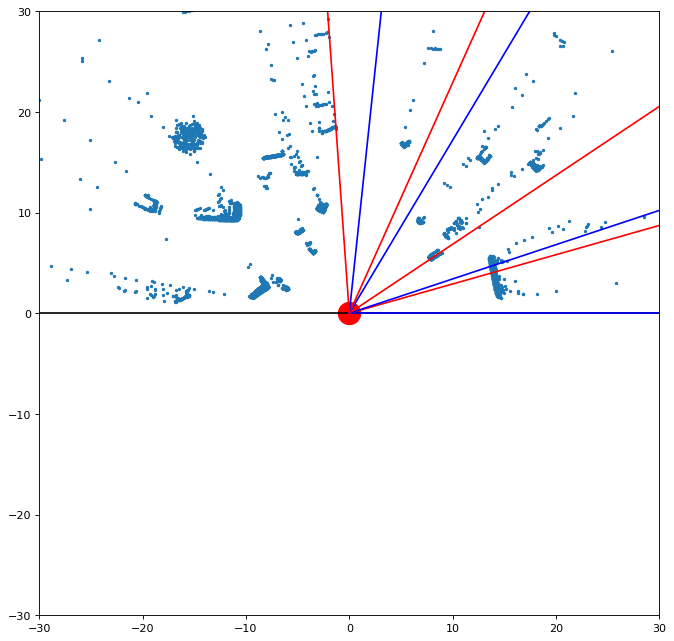

In [387]:
def getX(a):
    
    if(a>90):
        x = np.linspace(-30,0,100)
    else:
        x = np.linspace(0,30,100)
    #x = np.linspace(-30,30,100)
    return x


# Plot the separators 
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
# ax = fig.gca()
# ax.set_xticks(np.arange(-120, 120, grid_size))
# ax.set_yticks(np.arange(-120, 120, grid_size))

# plt.scatter(allData[i]['Z'], allData[i]['X'], s=4)
plt.scatter(newX_positives, newY_positives, s=4)
plt.scatter(0, 0, s=400, c="red")


# Generate the plot here. 
for a in emptyDegrees:
    # Plot start lines 

    x_start=getX(a[0])
    y_start = math.tan(math.radians(a[0])) * x_start
    plt.plot(x_start, y_start, '-b')
    
    # plot end lines 
    x_end=getX(a[1])
    y_end = math.tan(math.radians(a[1])) * x_end
    plt.plot(x_end, y_end, '-r')

plt.hlines(0, -30, 30)
plt.xlim(-30, 30)
plt.ylim(-30, 30)
# plt.savefig(str(i)+'-image.png')
plt.show()

In [278]:
t2=(1,2)
t3=(3,4)

myList=[]

myList.append(t2)
myList.append(t3)

myList[0][0]

1

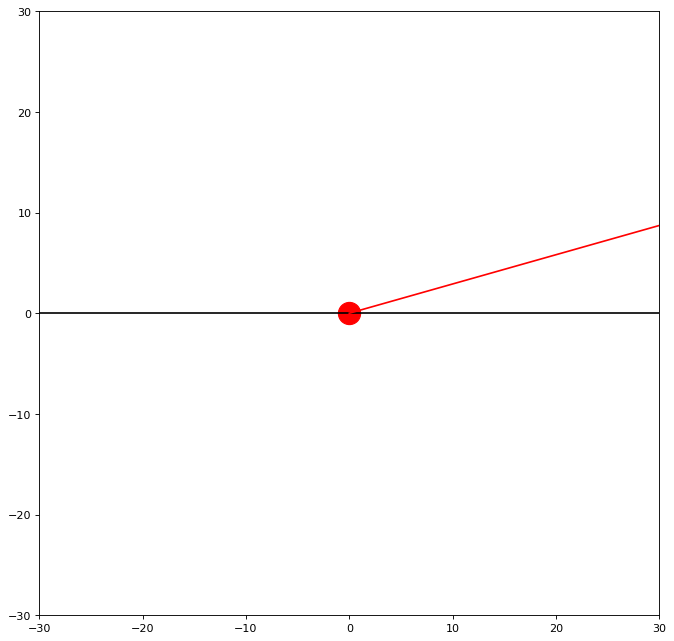

In [356]:
x = np.linspace(0,30,100)
fig = plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.scatter(0, 0, s=400, c="red")

    
# plot end lines 
x_end=x
y_end = math.tan(math.radians(16.2)) * x_end

plt.plot(x_end, y_end, '-r')

plt.hlines(0, -30, 30)
plt.xlim(-30, 30)
plt.ylim(-30, 30)
# plt.savefig(str(i)+'-image.png')
plt.show()